# Problem 3 - Perceptron

## 3.1

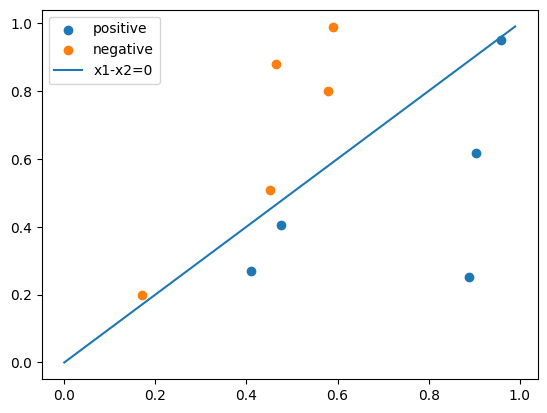

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(0)

def dataset(n, area):
  import numpy as np
  dataset = []

  if area == 1:
    for i in range(n):
        dataset.append([random.random(), random.random()])

  elif area == 'circle':
    for sample in range(n):
        dataset.append([random.random(),random.random()])

  for x in dataset:
      if x[0] > x[1]:
          x.append(1)
      else:
          x.append(-1)
  return np.array(dataset)

# Generating the training set
training = dataset(10,1)
training_x = training[:,:2]
training_y = training[:,2:]

positive_array = training_x[training_x[:, 0] > training_x[:, 1]]
negative_array = training_x[training_x[:, 0] <= training_x[:, 1]]


# Generating the test set
test = dataset(5000, 'circle')
test_x = test[:,:2]
test_y = test[:,2:]

x1_range = np.arange(0, 1, 0.01)

plt.scatter(positive_array[:,0], positive_array[:,1], label='positive')
plt.scatter(negative_array[:,0], negative_array[:,1], label='negative')
plt.plot(x1_range, x1_range, label='x1-x2=0')
plt.legend()
plt.show()


Above we can see the plot of our training data separated into positive and negative datapoints.

In [ ]:
from sklearn.metrics import accuracy_score

class perceptron:
  def __init__(self):
    self.weights = None
    self.a = None

  # The loss function used for learning. a = 0 perceptron criterion, a = 1 hinge loss
  def loss_function(self,X):
    return np.sign(self.a - np.dot(self.weights,X))

  # The predict function to round the number for the positive values
  def predict(self,X):
    y_predicted = []
    for x in X:
      y_predicted.append(self.loss_function(x))
    return np.array(y_predicted)

  # X is the x values from the training set
  # Y are the lables for the training set
  # a = 0 perceptron criterion, a = 1 hinge loss
  # epoch = number of weight training cycles
  def fit(self,X,Y,a,epoch):
    self.a = a
    self.weights = [random.random() for i in range(len(X[0]))]
    for step in range(epoch):
      for x,y in zip(X,Y):
        prediction = self.loss_function(x)
        error = int(y[0]) - prediction
        if y[0] != prediction:
          self.weights = self.weights + (-0.1 * error * x ) #adjusting the weights

In [ ]:
perceptron_PCLoss = perceptron()

perceptron_PCLoss.fit(training_x,training_y, 0, 1000) # a = 0 perceptron criterion loss

y_predicted = perceptron_PCLoss.predict(test_x)
print(accuracy_score(y_predicted, np.array(test_y)))

#print(y_predicted, np.array(test_y))

0.9478


**Answer:**
We have created and implemented our Perceptron Algorithm with perceptron criterion loss. We have trained the model on our training data with 1000 epoch and the accuracy of this algortihm on the testing data is high at 0.9478.

## 3.2

In [ ]:
# your code starts here
perceptron_HingeLoss= perceptron()

perceptron_HingeLoss.fit(training_x,training_y, 1, 1000) # a = 1 hinge loss

y_predicted2 = perceptron_HingeLoss.predict(test_x)
print(accuracy_score(y_predicted2, np.array(test_y)))

0.9536


**Answer:**
We have used the same perceptron algorithm as before but this time instead of the perceptron criterion loss function we used hinge loss and achieved slightly higher accuracy at 0.9536 with same number of epochs (1000).

## 3.3

**Answer:**
Hinge-loss expectedly has higer accuracy because it encourages a larger margin between classes, which often leads to better generalization. This is because the larger/wider margin makes it less likely to misclassify points that are close to the boundary. In our application the perceptron with hinge-loss has slightly higher accuracy at 0.9536 compared to the one with perceptron criterion loss function that has accuracy of 0.9478. Additionally, it is worth to note that both of our models do have quite high and very similar accuracies.

## 3.4

**Answer:**
We would expect the classification to not change significantly when using hinge-loss since it encurages a larger margin and penalizes points that are closer to the decision boundary, which results in a classifier that is less sensitive to individual training examples. Further, perceptron criterion loss is more sensitive to individual points, and changing the training set can have a more significant impact on the decision boundary.

